# Lab 6.01 - Regression analysis

In [2]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [3]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv').set_index('ID')
# Show the first few records of the Data Frame
cats.head()

,Sex,Hwt,Bwt
ID,,,
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3


2. Draw a scatter plot of both variables.


<Axes: xlabel='Hwt', ylabel='Bwt'>

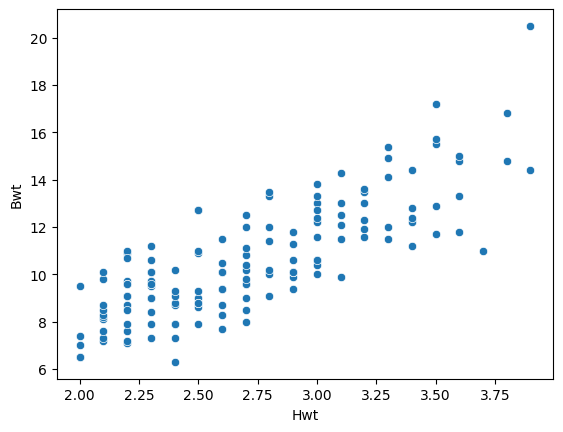

In [4]:
sns.scatterplot(data=cats, x='Hwt', y='Bwt')

3. Calculate and draw the regression line.


<Axes: xlabel='Bwt', ylabel='Hwt'>

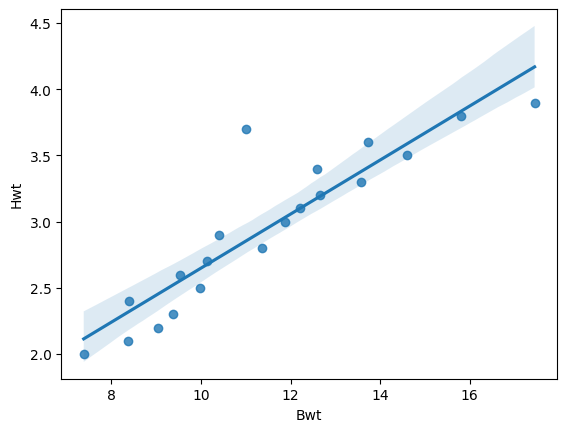

In [6]:
cat_m = cats.groupby(['Hwt'])['Bwt'].mean().reset_index()
cat_m
sns.regplot(data=cat_m, x='Bwt', y='Hwt')

4. Calculate the correlation coefficient and the coefficient of determination.

In [7]:
# Correlation calculated from covariance
stdx = cat_m['Bwt'].std()
stdy = cat_m['Hwt'].std()

# Correlation calculated from covariance
covar = np.cov(cat_m['Bwt'], cat_m['Hwt'], ddof=1)[0][1] 

R1 = covar / (stdx * stdy)
print(f"R ≈ {covar:.3f} / ( {stdx:.3f} * {stdy:.3f} ) ≈ {R1:.3f}")
print(R1 ** 2)

R ≈ 1.422 / ( 2.640 * 0.592 ) ≈ 0.910
0.8285339115430271


5. Interpret the results from the previous steps.

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [8]:
cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables for each gender.


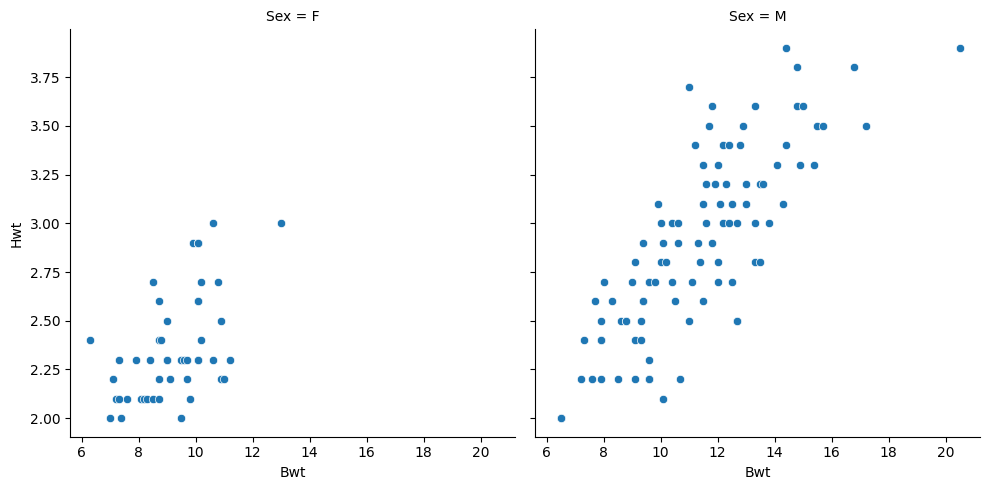

In [9]:
sns.relplot(data=cats, x='Bwt', y='Hwt', col="Sex", kind='scatter')

3. Calculate and draw the regression line.


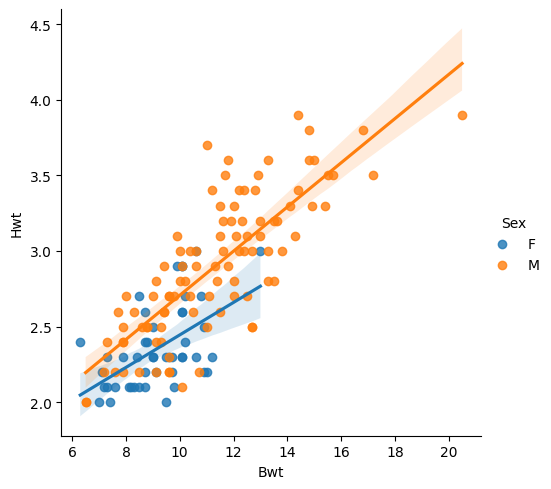

In [10]:
sns.lmplot(data=cats, x='Bwt', y='Hwt', hue='Sex');

In [26]:
least_squares = pd.DataFrame({
        'x': cats['Hwt'],
        'y': cats['Bwt']
    })
mx = least_squares.x.mean()
my = least_squares.y.mean()

least_squares['(x-x̄)'] = least_squares['x'] - mx
least_squares['(y-ȳ)'] = least_squares['y'] - my

least_squares['(x-x̄)(y-ȳ)'] = least_squares['(x-x̄)'] * least_squares['(y-ȳ)']
least_squares['(x-x̄)²'] = least_squares['(x-x̄)'] ** 2
least_squares

,x,y,(x-x̄),(y-ȳ),(x-x̄)(y-ȳ),(x-x̄)²
0,2.0,7.0,-0.723611,-3.629861,2.626608,0.523613
1,2.0,7.4,-0.723611,-3.229861,2.337163,0.523613
2,2.0,9.5,-0.723611,-1.129861,0.817580,0.523613
3,2.1,7.2,-0.623611,-3.429861,2.138899,0.388891
4,2.1,7.3,-0.623611,-3.329861,2.076538,0.388891
...,...,...,...,...,...,...
139,3.7,11.0,0.976389,0.370139,0.361399,0.953335
140,3.8,14.8,1.076389,4.170139,4.488691,1.158613
141,3.8,16.8,1.076389,6.170139,6.641469,1.158613
142,3.9,14.4,1.176389,3.770139,4.435149,1.383891


Regression line: ŷ = 1.02 + 0.16 x


-0.35107837719696455 4.031757486783179
beta_1 = 135.79 / 33.68 = 4.03
beta_0 = 10.63 - 4.03 * 2.72 = -0.35
ŷ = -0.35 + 4.03 x


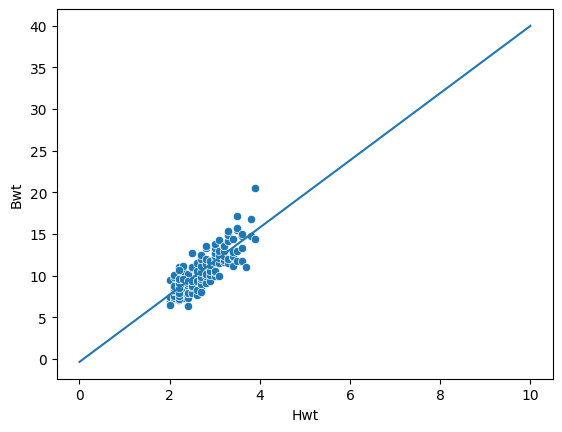

In [29]:

import math

# Numerator and denomitator of the formula for b_0:
num = sum(least_squares['(x-x̄)(y-ȳ)'])
denom = sum(least_squares['(x-x̄)²'])
beta1 = num/denom
beta0 = my - beta1 * mx



xmin = math.floor(cats['Bwt'].min() / 10) * 10
xmax = math.ceil(cats['Hwt'].max() / 10) * 10

ymin = math.floor(cats['Hwt'].min() / 10) * 10
ymax = math.ceil(cats['Hwt'].max() / 10) * 10

x_values = [xmin, xmax]
y_values = [beta1 * x_values[0] + beta0, beta1 * x_values[1] + beta0]

print(beta0, beta1)


sns.lineplot(x=x_values, y=y_values);
sns.scatterplot(x=cats['Hwt'], y=cats['Bwt']);


print(f"beta_1 = {num:.2f} / {denom:.2f} = {beta1:.2f}")
print(f"beta_0 = {my:.2f} - {beta1:.2f} * {mx:.2f} = {beta0:.2f}")
print(f"ŷ = {beta0:.2f} + {beta1:.2f} x")

4. Calculate the correlation coefficient and the coefficient of determination.


In [30]:
cat_m = cats[(cats['Sex'] == 'M')]
#cat_m = cats.groupby('Hwt')['Bwt'].mean().reset_index()

cat_f = cats[(cats['Sex'] == 'F')]
#cat_f = cats.groupby('Hwt')['Bwt'].mean().reset_index()

cor = np.corrcoef(cats['Bwt'], cats['Hwt'])[0][1]

cor_m = np.corrcoef(cat_m['Bwt'], cat_m['Hwt'])[0][1]
cor_f = np.corrcoef(cat_f['Bwt'],  cat_f['Hwt'])[0][1]


5. Interpret the results from the previous steps.

In [31]:
print(f"R ≈ {cor_m:.3f}")
print(cor_m ** 2)

print(f"R ≈ {cor_f:.3f}")
print(cor_f ** 2)

print(f"R ≈ {cor:.3f}")
print(cor ** 2)

R ≈ 0.793
0.628919289013444
R ≈ 0.532
0.28307684762918817
R ≈ 0.804
0.6466327561709655


### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |
